# Lecture 8: From Data to Facts

## Contents
- [Imports](#section1)
- [Operations of Pandas](#section2)
    - [Vectorized string operations](#subsection2.1)
    - [Data type change via the <code>astype()</code> method ](#subsection2.2)
    - [Handling missing data](#subsection2.3)
- [Insights from data visualization](#section3)
- [Introduction to Inferential Statistics](#section4)
    - [Review of probability theory](#subsection4.1)
    - [Samples and populations](#subsection4.2)
    - [Sampling distributions](#subsection4.3)
    - [Central limit theorem](#subsection4.4)


## Imports <a id="section1"></a>
Besides the usual Python packages we used before, this document requires an extra package [<code>ipywidets</code>](https://ipywidgets.readthedocs.io/en/latest/) to create interactive widgets. Detailed steps of installing the package is given [here](https://ipywidgets.readthedocs.io/en/latest/user_install.html), where you may first try "with conda". It is recommended to disable "Toggle scrolling" by "Cell->Current Output->Toggle Scrolling" for a better looking. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import binom       # Import objects for the binomial distribution
from scipy.stats import norm        # Import objects for the normal distribution 

The following code cell is used to import functions for visualizing the concepts of probability theory and statistics. Please place the file "visual_distr" in the same folder as your lecture notes file, otherwise you may not be able to run the importing commands below. 

In [3]:
from visual_distr import plot_normal
from visual_distr import plot_sdistr

There is no need to look into the source code and understand how these functions work. You may simply use them with the 'leap of faith'. 

## Operations of Pandas <a id="section2"></a>

### Vectorized string operations <a id="subsection2.1"></a>

In previous lectures, we learned quite a few string operations, such as case conversions, indexing and slicing, as well as how to find a given character in a string. In a Pandas data frame, can we apply these operations to a whole column (series) of strings? The answer is yes and it can be easily done by the `str` attribute of a series of strings.

Take the Singapore condo data for example, what if we want to change all condo project names from upper cases to lower cases?

In [51]:
data_condo = pd.read_csv('condo.csv')
data_condo.head()

,name,price,unit_price,district_code,...,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,...,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,...,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,...,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,...,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,...,1259,01 to 05,999.0,Nov-19


In [4]:
data_condo['name']

0                    SEASCAPE
1         COMMONWEALTH TOWERS
2                 THE TRILINQ
3                   THE CREST
4               THE ANCHORAGE
                 ...         
32163          SKIES MILTONIA
32164         SYMPHONY SUITES
32165               SELETARIS
32166    RIVERBANK @ FERNVALE
32167             THE ESTUARY
Name: name, Length: 32168, dtype: object

In [5]:
data_condo['name'].str.lower()

0                    seascape
1         commonwealth towers
2                 the trilinq
3                   the crest
4               the anchorage
                 ...         
32163          skies miltonia
32164         symphony suites
32165               seletaris
32166    riverbank @ fernvale
32167             the estuary
Name: name, Length: 32168, dtype: object

It can be seen that by using the attribute `str`, we can apply the vectorized `lower()` operations to all strings in the series `data_condo['name']`. Other operations can also be vectorized similarly by the `str` attribute, as demonstrated by the following example. 

<div class="alert alert-block alert-success">
<b>Example 1:</b> Create subsets of the dataset 'condo.csv' with the project names respectively satisfy 1) has the length longer than 20 characters; 2) has at least three words; 3) contains the letter "D" (or "d"); and 4) starts with the letter "D". 
</div>


In [6]:
p_names = data_condo['name']

In [7]:
is_long = p_names.str.len() > 20        # Vectorized len function
is_long

0        False
1        False
2        False
3        False
4        False
         ...  
32163    False
32164    False
32165    False
32166    False
32167    False
Name: name, Length: 32168, dtype: bool

In [8]:
data_condo.loc[is_long]

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
8,CARIBBEAN AT KEPPEL BAY,1470000,1751,4,RCR,Resale,840,06 to 10,79.0,Oct-19
11,REFLECTIONS AT KEPPEL BAY,2130000,1310,4,RCR,Resale,1625,01 to 05,86.0,Oct-19
12,REFLECTIONS AT KEPPEL BAY,2056000,1661,4,RCR,Resale,1238,06 to 10,86.0,Oct-19
16,CARIBBEAN AT KEPPEL BAY,1320000,1572,4,RCR,Resale,840,01 to 05,79.0,Oct-19
27,GOLD COAST CONDOMINIUM,2025000,1107,5,RCR,Resale,1830,01 to 05,999.0,Oct-19
...,...,...,...,...,...,...,...,...,...,...
32143,ORCHID PARK CONDOMINIUM,700000,731,27,OCR,Resale,958,01 to 05,74.0,Nov-16
32146,ORCHID PARK CONDOMINIUM,705000,720,27,OCR,Resale,980,06 to 10,74.0,Nov-16
32149,SELETAR PARK RESIDENCE,1050000,1251,28,OCR,Resale,840,01 to 05,94.0,Nov-16
32155,SELETAR SPRINGS CONDOMINIUM,1300000,629,28,OCR,Resale,2067,01 to 05,80.0,Nov-16


In [9]:
num_spaces = p_names.str.count(' ')     # No. of whitespaces in the string
num_words = num_spaces + 1              # No. of words
num_words

0        1
1        2
2        2
3        2
4        2
        ..
32163    2
32164    2
32165    1
32166    3
32167    2
Name: name, Length: 32168, dtype: int64

In [10]:
data_condo.loc[num_words >= 3]

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
5,MOUNT FABER LODGE,4400000,1188,4,RCR,Resale,3703,06 to 10,999.0,Oct-19
8,CARIBBEAN AT KEPPEL BAY,1470000,1751,4,RCR,Resale,840,06 to 10,79.0,Oct-19
11,REFLECTIONS AT KEPPEL BAY,2130000,1310,4,RCR,Resale,1625,01 to 05,86.0,Oct-19
12,REFLECTIONS AT KEPPEL BAY,2056000,1661,4,RCR,Resale,1238,06 to 10,86.0,Oct-19
16,CARIBBEAN AT KEPPEL BAY,1320000,1572,4,RCR,Resale,840,01 to 05,79.0,Oct-19
...,...,...,...,...,...,...,...,...,...,...
32148,RIVERBANK @ FERNVALE,936000,988,28,OCR,New Sale,947,16 to 20,96.0,Nov-16
32149,SELETAR PARK RESIDENCE,1050000,1251,28,OCR,Resale,840,01 to 05,94.0,Nov-16
32155,SELETAR SPRINGS CONDOMINIUM,1300000,629,28,OCR,Resale,2067,01 to 05,80.0,Nov-16
32160,THE MILTONIA RESIDENCES,1630000,785,27,OCR,Resale,2077,01 to 05,93.0,Nov-16


In [11]:
p_names_lower = p_names.str.lower()
is_d_names =p_names_lower.str.contains('d')
data_condo.loc[is_d_names]

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
5,MOUNT FABER LODGE,4400000,1188,4,RCR,Resale,3703,06 to 10,999.0,Oct-19
7,DOVER PARKVIEW,1088000,1162,5,RCR,Resale,936,06 to 10,73.0,Oct-19
10,WESTCOVE CONDOMINIUM,970000,834,5,OCR,Resale,1163,01 to 05,75.0,Oct-19
19,VILLA DE WEST,1750000,1145,5,RCR,Resale,1528,01 to 05,999.0,Oct-19
20,DOMAIN 21,1493000,1613,3,RCR,Resale,926,16 to 20,84.0,Oct-19
...,...,...,...,...,...,...,...,...,...,...
32155,SELETAR SPRINGS CONDOMINIUM,1300000,629,28,OCR,Resale,2067,01 to 05,80.0,Nov-16
32156,NIM GARDENS,1680000,758,28,OCR,Resale,2217,01 to 05,999.0,Nov-16
32158,H2O RESIDENCES,870000,1023,28,OCR,Resale,850,16 to 20,93.0,Nov-16
32159,CANBERRA RESIDENCES,1150000,876,27,OCR,Resale,1313,01 to 05,93.0,Nov-16


In [12]:
is_d_start = p_names_lower.str[0] == 'd'
data_condo.loc[is_d_start]

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
7,DOVER PARKVIEW,1088000,1162,5,RCR,Resale,936,06 to 10,73.0,Oct-19
20,DOMAIN 21,1493000,1613,3,RCR,Resale,926,16 to 20,84.0,Oct-19
47,DOVER PARKVIEW,1336000,1070,5,RCR,Resale,1249,01 to 05,73.0,Oct-19
68,DOVER PARKVIEW,980000,1046,5,RCR,Resale,936,16 to 20,73.0,Sep-19
90,DOMAIN 21,1830000,1429,3,RCR,Resale,1281,11 to 15,84.0,Sep-19
...,...,...,...,...,...,...,...,...,...,...
27393,DAINTREE RESIDENCE,1082050,1621,21,RCR,New Sale,667,01 to 05,98.0,Jul-18
27394,DAINTREE RESIDENCE,1797400,1621,21,RCR,New Sale,1109,01 to 05,98.0,Jul-18
27395,DAINTREE RESIDENCE,1072550,1607,21,RCR,New Sale,667,01 to 05,98.0,Jul-18
27396,DAINTREE RESIDENCE,1280600,1652,21,RCR,New Sale,775,01 to 05,98.0,Jul-18


The `str` attribute provides rich tools for vectorized string operations. You may use the `help(data_condo.str)` command to find more information. 

### Data type change via the `astype()` method <a id="subsection2.2"></a>

In Python, data types are a key factor in determining the behaviors of data objects. Data type conversion is commonly used in data processing. Take the Singapore condo data for example, the column `level` is given as a series of strings in the format of "XX to YY". In preparing the data, we may want to create two columns `level_from` as the integer type objects "XX" and `level_to` the the integer type objects "YY". It can be done by using the method `astype()` which casts an entire row or column of Pandas objects to a specific data type. 

In [13]:
levels = data_condo['level']
data_condo['level_from'] = levels.str[:2].astype(int)
data_condo['level_to'] = levels.str[-2:].astype(int)
data_condo.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date,level_from,level_to
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19,6,10
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19,16,20
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19,6,10
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19,1,5
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19,1,5


### Handling missing data <a id="subsection2.3"></a>

It is pretty common that real-world datasets may have some amount of data missing, such as the following GDP data for most countries from the year 1960 to 2018. 

In [14]:
pd.options.display.max_columns = 8
data_gdp = pd.read_csv('gdp.csv')
data_gdp

,Country Name,Country Code,1960,1961,...,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,...,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,...,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10
2,Angola,AGO,NaN,NaN,...,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11
3,Albania,ALB,NaN,NaN,...,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10
4,Andorra,AND,NaN,NaN,...,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09
...,...,...,...,...,...,...,...,...,...
210,Samoa,WSM,NaN,NaN,...,7.883073e+08,7.993764e+08,8.319038e+08,8.204918e+08
211,"Yemen, Rep.",YEM,NaN,NaN,...,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10
212,South Africa,ZAF,7.575397e+09,7.972997e+09,...,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11
213,Zambia,ZMB,7.130000e+08,6.962857e+08,...,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10


It can be seen that the missing values are indicated by the mark <code>NaN</code>, meaning "not a number", in the data table. Next, we will discuss some basic operations that address missing data.

#### Detecting missing data:  <code>isnull()</code> and <code>notnull()</code>

The method <code>isnull</code> is associated with <code>pandas.DataFrame</code> and <code>pandas.Series</code> objects. It returns <code>True</code> if the item in the table is <code>NaN</code>, and <code>False</code> otherwise. 

In [15]:
data_gdp.loc[:, '1960':'1961'].isnull()

,1960,1961
0,True,True
1,False,False
2,True,True
3,True,True
4,True,True
...,...,...
210,True,True
211,True,True
212,False,False
213,False,False


In [16]:
data_gdp['1960'].isnull()

0       True
1      False
2       True
3       True
4       True
       ...  
210     True
211     True
212    False
213    False
214    False
Name: 1960, Length: 215, dtype: bool

The other method, <code>notnull()</code>, as you can tell from the name, returns <code>True</code> if the item is not <code>NaN</code> and <code>False</code> otherwise. It is convenient to use this method for the selection of non-<code>NaN</code> rows from the data frame. For example, we can retrieve all GDP values for the year 1960 that are not <code>NaN</code> by the following code.

In [17]:
gdp_1960 = data_gdp.loc[data_gdp['1960'].notnull(), # Select rows
                        ['Country Name', '1960']]   # Select columns
gdp_1960

,Country Name,1960
1,Afghanistan,5.377778e+08
10,Australia,1.857767e+10
11,Austria,6.592694e+09
13,Burundi,1.960000e+08
14,Belgium,1.165872e+10
...,...,...
204,St. Vincent and the Grenadines,1.306656e+07
205,"Venezuela, RB",7.779091e+09
212,South Africa,7.575397e+09
213,Zambia,7.130000e+08


#### Dropping missing values: <code>dropna()</code>
A more convenient way of selecting items that are not <code>NaN</code> is to use the <code>dropna()</code> method, which also applies to both <code>pandas.DataFrame</code> and <code>pandas.Series</code> objects. We will use a subset of the GDP data to demonstrate how it works.

In [18]:
gdp_subset = data_gdp.loc[:6, '1981':'1986']
gdp_subset

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


By default, the <code>dropna()</code> method drops all rows in which any null value is present. As you can see from the following example, rows <code>0</code>, <code>1</code> and <code>3</code> that have <code>NaN</code> values are removed, so there are only four rows left after dropping these rows. 

In [19]:
temp = gdp_subset.dropna()
temp

,1981,1982,1983,1984,1985,1986
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


Please note that in the default setting, the <code>dropna()</code> method returns a new <code>pandas.DataFrame</code> object with the <code>NaN</code> rows removed, while the original data table remain unchanged. 

In [20]:
gdp_subset      # The original data frame remains unchanged

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


We can also remove the <code>NaN</code> rows from the original data frame by configuring the argument <code>inplace=True</code>. In such cases, the original data frame is overwritten, but the method <code>dropna()</code> returns nothing (<code>None</code>).

In [21]:
temp = gdp_subset.dropna(inplace=True)
print(temp)     # The output of the dropna method is None

None


In [22]:
gdp_subset      # The original data frame is overwritten

,1981,1982,1983,1984,1985,1986
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


You may use the <code>help()</code> function to explore other arguments of the <code>dropna()</code> method, such as <code>axis</code> and <code>how</code>.

#### Replacing <code>NaN</code> by other values: <code>fillna()</code>

Sometimes rather than dropping <code>NaN</code> values, you would rather replace them with a valid value, such as zero or a string remark. This can be done by using the <code>fillna()</code> method. 

In [24]:
gdp_subset = data_gdp.loc[:6, '1981':'1986']
gdp_subset

,1981,1982,1983,1984,1985,1986
0,NaN,NaN,NaN,NaN,NaN,4.054634e+08
1,3.478788e+09,NaN,NaN,NaN,NaN,NaN
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


In [25]:
temp = gdp_subset.fillna('Unknown') # Fill all NaN items with 'Unknown'
temp

,1981,1982,1983,1984,1985,1986
0,Unknown,Unknown,Unknown,Unknown,Unknown,4.05463e+08
1,3.47879e+09,Unknown,Unknown,Unknown,Unknown,Unknown
2,5.55048e+09,5.55048e+09,5.78434e+09,6.13148e+09,7.55356e+09,7.07206e+09
3,Unknown,Unknown,Unknown,1.85734e+09,1.89705e+09,2.09733e+09
4,3.88959e+08,3.75896e+08,3.27862e+08,3.30071e+08,3.46738e+08,4.82001e+08
5,4.93334e+10,4.66227e+10,4.28033e+10,4.1808e+10,4.06037e+10,3.39436e+10
6,7.86768e+10,8.43075e+10,1.03979e+11,7.9092e+10,8.84167e+10,1.10934e+11


Similar to the previous case, the argument <code>inplace</code> can be used to determine if the method returns a new data frame or simply overwrite the original data frame without returning anything.

In [26]:
gdp_subset.fillna(0, inplace=True) # Fill all NaN items with zero
gdp_subset

,1981,1982,1983,1984,1985,1986
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.054634e+08
1,3.478788e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09
3,0.000000e+00,0.000000e+00,0.000000e+00,1.857338e+09,1.897050e+09,2.097326e+09
4,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08
5,4.933342e+10,4.662272e+10,4.280332e+10,4.180795e+10,4.060365e+10,3.394361e+10
6,7.867684e+10,8.430749e+10,1.039791e+11,7.909200e+10,8.841667e+10,1.109344e+11


## Insights from data visualization <a id="section3"></a>

<div class="alert alert-block alert-success">
<b>Example 2:</b> The 'condo.csv' dataset contain the prices of condos in Singapore for the past a few years. Use data visualization to explore the price differences between resale and new condos. 
</div>

After reading the dataset from the "csv" file, we can retrieve the first a few rows or the last a few rows by the method <code>pandas.DataFrame.head()</code> or <code>pandas.DataFrame.tail()</code>. It is helpful for our further analysis by showing labels and typical values of all columns. 

In [27]:
data_condo = pd.read_csv('condo.csv')
data_condo.head(6)

,name,price,unit_price,district_code,...,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,...,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,...,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,...,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,...,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,...,1259,01 to 05,999.0,Nov-19
5,MOUNT FABER LODGE,4400000,1188,4,...,3703,06 to 10,999.0,Oct-19


In [28]:
data_condo.tail()

,name,price,unit_price,district_code,...,area,level,remaining_years,date
32163,SKIES MILTONIA,1268000,1178,27,...,1076,11 to 15,95.0,Nov-16
32164,SYMPHONY SUITES,824000,1034,27,...,797,06 to 10,97.0,Nov-16
32165,SELETARIS,1250000,754,27,...,1658,01 to 05,999.0,Nov-16
32166,RIVERBANK @ FERNVALE,1082000,1026,28,...,1055,16 to 20,96.0,Nov-16
32167,THE ESTUARY,610000,1012,27,...,603,01 to 05,91.0,Nov-16


Another piece of important information is the number of observations and the number of variables, which can be obtained by the attribute <code>shape</code> of the <code>pandas.DataFrame</code> object.

In [29]:
print(data_condo.shape)

(32168, 10)


Then we can use the method <code>unique()</code> of the <code>pandas.Series</code> data type to retrieve all possible values of this column. 

In [30]:
data_condo['type'].unique()

array(['Resale', 'New Sale'], dtype=object)

In [31]:
data_condo['district_code'].unique()

array([ 4,  3,  5,  1,  2,  9, 10,  8, 15, 11, 13, 12, 14, 18, 16, 20, 19,
       17, 21, 25, 23, 26, 22, 27, 28])

It can be seen that for the column <code>type</code>, we have two unique values: "Resale", and "New Sale". Based on these two values, we can split the dataset into two parts, and plot the bar graph.

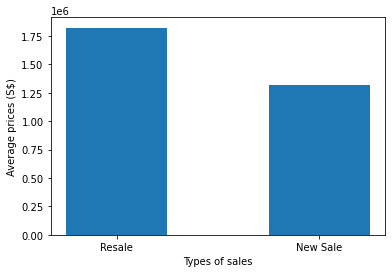

In [32]:
data_resale = data_condo.loc[data_condo['type']=='Resale']  # Resale condos 
data_new = data_condo.loc[data_condo['type']=='New Sale']   # New sale condos

plt.bar(['Resale', 'New Sale'],                             # x-data 
        [data_resale['price'].mean(), 
         data_new['price'].mean()],                         # y-data 
        width=0.5)                                          # Width of bars

plt.xlabel('Types of sales')
plt.ylabel('Average prices (S$)')

plt.show()

Similarly, we can use the histogram below to depict the differences between prices. 

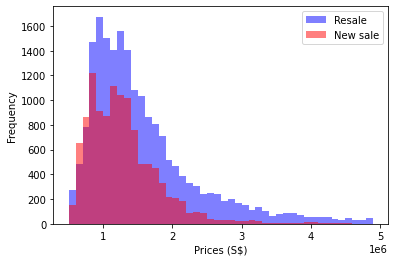

In [33]:
bins = np.arange(0.5e6, 5e6, 0.1e6)             # A sequence of number as histogram bins

plt.hist(data_resale['price'], bins=bins,       
         alpha=0.5, color='b', label='Resale')
plt.hist(data_new['price'], bins=bins,
         alpha=0.5, color='r', label='New sale')

plt.xlabel('Prices (S$)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

How do we interpret the results shown by the data visualization above? Can you show the differences in prices by other charts?

<div class="alert alert-block alert-success">
<b>Example 3:</b> Consider condos that are 
  <li>In district 5 (Buona Vista, Dover, Pasir Panjang, West Coast)</li>
  <li>With areas smaller than 2000 square feet</li>
  <li>With the remaining years to be less than 100 years</li>
Use a bubble plot to show the following information:
  <li>The areas (in square feet)</li>
  <li>The prices (in S$)</li>
  <li>The type of condos (resale and new sale condos)</li>
  <li>The levels of apartments</li>
</div>

The following code select a subset of the overall dataset that satisfies the given conditions. 

In [34]:
subset = data_condo.loc[(data_condo['district_code']==5) & 
                        (data_condo['remaining_years']<99) & 
                        (data_condo['area']<2000)]

As the previous example, we can split the dataset into two parts according to the "resale" and "new sale" types. 

In [35]:
subset_resale = subset.loc[subset['type']=='Resale']
subset_new = subset.loc[subset['type']=='New Sale']

Please note that the level information in the dataset is in <code>str</code> type instead of numerical values. We can use the following code to convert the strings in the data table into <code>int</code> type. 

In [36]:
levels_resale = subset_resale['level'].str[-2:].astype(int)
levels_new = subset_new['level'].str[-2:].astype(int)

In the code above, the slicing expression <code>pandas.Series.str[:-2]</code> returns a new series with each element to be the last two characters of strings in the original series. Then all strings in the new series are converted into <code>int</code> type by the method <code>pandas.Series.astype()</code>. As a result, variables <code>levels_resale</code> and <code>levels_new</code> are two series with all elements to be numeric values of condo levels (upper bound). 

In [37]:
levels_resale[:5]

2     10
6     25
7     10
10     5
14     5
Name: level, dtype: int64

With the numerical values of levels, we create the following bubble plot.

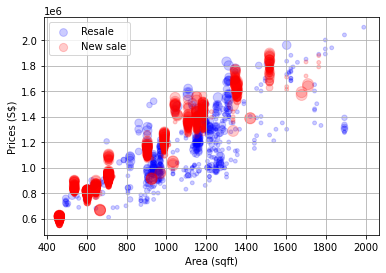

In [38]:
plt.scatter(subset_resale['area'], subset_resale['price'], 
            s=3*levels_resale, c='b', alpha=0.2,
            label='Resale')

plt.scatter(subset_new['area'], subset_new['price'], 
            s=3*levels_new, c='r', alpha=0.2,
            label='New sale')

plt.xlabel('Area (sqft)')
plt.ylabel('Prices (S$)')
plt.legend()
plt.grid()

plt.show()

A short summary of the Python code for constructing the bubble plots above:
1. A bubble plot uses x/y coordinates (the first two arguments <code>x</code> and <code>y</code>), colors (argument <code>c</code>), and bubble size (argument <code>s</code>) to show values of variables. We can even use different marker types (argument <code>marker</code>) to express another categorical variable. 
2. If the bubbles are too small or too big, we can adjust their sizes by scaling the corresponding values. Such as in this case, the original values of <code>levels_resale</code> and <code>levels_new</code> are too small, so we multiply the values by 3 to enlarge the bubbles. 
3. In cases where many bubbles are overlapping, we specify the transparency of bubbles via the argument <code>alpha</code>.
4. By using the function <code>legend()</code> from the <code>matplotlib.pyplot</code> module, we can create a legend that explains the meanings of different bubbles. 
5. The function <code>grid()</code> adds grid to the graph.
   
Now what can we tell from the graph above?

## Introduction to Inferential Statistics <a id="section4"></a>

### Review of Probability Theory <a id="subsection4.1"></a>

#### Properties of expected values and variances
Let $X$ be an arbitrary random variable, and $a$ and $c$ are two constants, then we have
- $\mathbb{E}(c) = c$;
- $\mathbb{E}(aX+c) = a\mathbb{E}(X) + c$.

If $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of random variables, then we have
- $\mathbb{E}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i\mathbb{E}(X_i)$

As a special case that each $a_i=1$, then the equation above can be written as $\mathbb{E}\left(\sum_{i=1}^nX_i\right)=\sum_{i=1}^n\mathbb{E}(X_i)$.

Let $X$ and $Y$ be two random variables, and $a$, $b$, and $c$ are three constants, then we have
- $\text{Var}(c) = 0$;
- $\text{Var}(aX+c) = a^2\text{Var}(X)$;
- $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X, Y)$.

In a special case that $X$ and $Y$ are uncorrelated, the covariance between $X$ and $Y$ is zero, so the last equation can be written as $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y)$. Such a result can be extend to the following case
- $\text{Var}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i^2\text{Var}(X_i)$,

where $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of **pairwise uncorrelated** random variables. 

#### Discrete random variables and their distributions
A random variable $X$ is defined to be **discrete** if its possible outcomes are finite or countable. A few examples are given below.
1. The result of rolling a dice (discrete uniform distribution)
2. The preference of one customer for Coke or Pepsi (Bernoulli distribution)
3. Among 10 customers, the number of people who prefer Coke over Pepsi (Binomial distribution) 
4. The number of patients arriving in an emergency room within a fixed time interval (Poisson distribution)

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, the <b>probability mass function (PMF)</b> is given by:
    \begin{align}
    P(X=x_j) = p_j, \text{   for each }j=1, 2, ..., k,
    \end{align}
where $p_j$ is the probability of the outcome $x_j$, and all $p_i$ must satisfy 
    \begin{cases}
    0\leq p_i \leq 1 \\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>

<div class="alert alert-block alert-success">
<b>Example 4:</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, among which the number of customers who prefer Coke is denoted by a discrete random variable $X$. Plot the PMF of $X$. 
</div>

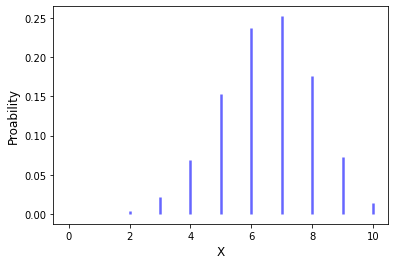

In [39]:
n = 10                                          # Number of customers 
p = 0.65                                        # Propability of choosing Coke
x = np.arange(n+1)                              # All possible values of X
pmf = binom.pmf(x, n, p)                        # The PMF of the random variable X

plt.vlines(x, ymin=0, ymax=pmf, linewidth=2.5, 
           colors='b', alpha=0.6)               # Plot vertical lines

plt.xlabel('X', fontsize=12)
plt.ylabel('Proability', fontsize=12)
plt.show()

<div class="alert alert-block alert-danger">
    <b>Notes: </b> The <b>cumulative distribution function (CDF)</b> of a random variable $X$ is defined as 
    \begin{align}
    F(x) = P(X\leq x).
    \end{align}
</div>

<div class="alert alert-block alert-success">
<b>Example 5:</b> Plot the CDF of the random variable $X$ described in <b>Example 4</b>. 
</div>

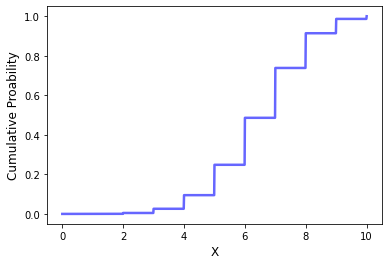

In [40]:
n = 10                                  # Number of customers                          
p = 0.65                                # Probability of choosing Coke
step = 0.01
x = np.arange(0, n+step, step)          # Continous values of X
cdf = binom.cdf(x, n, p)                # The CDF of the random variable X

plt.plot(x, cdf, linewidth=2.5, 
         c='b', alpha=0.6)              # Plot the curve for the CDF

plt.xlabel('X', fontsize=12)
plt.ylabel('Cumulative Proability', 
           fontsize=12)                 
plt.show()

#### Continuous random variables and their distributions
A variable $X$ is a **continuous random variable** if it takes on any real value with *zero* probability. Random variables following uniform, normal (Gaussian) and exponential distributions are all continuous variables.  

For continuous random variables, there is no PMF as the discrete random variables, because $P(X=x)=0$ for all values of $x$. The CDF for a continuous random variable has the same definition as the discrete case, which is $F(x)=P(X\leq x)$. Based on the CDF, we have other definitions listed as follows.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> Let $F(x)$ be the CDF of a continuous random variable $X$, then
    <li> The derivative $f(x) = \frac{\text{d} F(x)}{\text{d}x}$ of the CDF $F(x)$ is called the <b>probability density function (PDF)</b> of $X$. This definition also implies that $F(x) = \int_{-\infty}^{x}f(t)dt$ 
    <li> The inverse of CDF $F(x)$, denoted by $F^{-1}(q)$, is called the <b>Percent Point Function (PPF)</b>, where $q$ is the given cumulative probability. This function is sometimes referred to as the <b>inverse distribution function</b> or the <b>quantile function</b>.
</div>

We are using a standard normal distribution as an example to illustrate the definition of CDF, PDF, and PPF. You are encouraged to play with the chart below to better understand the geometric interpretation of these functions.

In [71]:
plot_normal()

Output()

Another important property of the CDF is given below.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a random variable and given values $x_1 \leq x_2$ ($x_1 < x_2$ for discrete variables), then the probability 
    \begin{align}
    P(x_1 \leq X \leq x_2) = P(X \leq x_2) - P(X \leq x_1) = F(x_2) - F(x_1).
    \end{align}
</div>

As a special case of continuous variables, if $x=x_1=x_2$, then we can prove that 
\begin{align}
P(X=x) = P(x\leq X \leq x) = F(x) - F(x) = 0.
\end{align}

#### The <code>scipy.stats</code> module and distribution objects
The [<code>scipy.stats</code>](https://docs.scipy.org/doc/scipy/reference/stats.html) module provides many Python objects for commonly used probability distributions, such as <code>binom</code> for binomial distributions and <code>norm</code> for normal distributions. The general syntax of calling these methods of distribution objects from the <code>scipy.stats</code> module is given as follows.

<center><b><code>object.method(<font color='blue'><i>variable</i></font>, <font color='blue'><i>distr_param_1</i></font>, <font color='blue'><i>distr_param_2</i></font>, ... )</code></b></center>

- <b><code>object</code></b> is the object of a specific type of distribution, such as <code>binom</code> for binomial and <code>norm</code> for normal distributions; 
- <b><code>method</code></b> specifies the distributional function, such as <code>pdf</code> for PDF, <code>pmf</code> for PMF, <code>cdf</code> for CDF, and <code>ppf</code> for PMF;
- <b><code><font color='blue'><i>variable</i></font></code></b> is the variable of the distributional function <b><code>method</code></b>;
- <b><code><font color='blue'><i>distr_param_1</i></font></code></b>, <b><code><font color='blue'><i>distr_param_2</i></font></code></b>, ... are the parameters specifying the shape of the distribution, such as the mean and the standard deviation specify the shape of a normal distribution. 

<div class="alert alert-block alert-success">
<b>Extra Example:</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, what is the probability that the majority of them select Coke?
</div>

In [42]:
p_coke = 1 - binom.cdf(5, n=10, p=0.65)
print('{0:0.3f}'.format(p_coke))

0.751


Please note that the first argument <b><code><font color='blue'><i>variable</i></font></code></b> can be an array or other compound data types, such as <code>x</code> in **Example 3** and **Example 4** is an array.

<div class="alert alert-block alert-success">
<b>Extra Example:</b> Calculate the 99.5th percentile of a standard normal distribution.
</div>

In [43]:
x = norm.ppf(0.995, loc=0, scale=1)
print('{0:0.3f}'.format(x))

2.576


The method <code>norm.ppf()</code> takes <code>loc=0</code> and <code>scale=1</code> as the default argument values, so we can leave these two argument unspecified for standard normal distribution. The code above can be thus simplified as follows.

In [44]:
x = norm.ppf(0.995)
print('{0:0.3f}'.format(x))

2.576


### Samples and populations <a id="subsection4.2"></a>

<div class="alert alert-block alert-success">
<b>Example 6:</b> The lifespans of all bulbs in a batch are recorded in a file called "bulb.csv". What is the mean lifespan of bulbs in this batch?
</div>

In [45]:
data_bulb = pd.read_csv('bulb.csv')
data_bulb.head()

,Lifespan
0,1347.337298
1,1340.418597
2,1382.394294
3,1309.760188
4,1341.330256


In [46]:
print(data_bulb.shape)

(200, 1)


It is easy to find the mean lifespan by the following code.

In [47]:
mean_value = data_bulb['Lifespan'].mean()
print('Population mean: {0:0.2f}'.format(mean_value))

Population mean: 1351.25


In this example, the whole batch is a **population** that we are interested in, and it is easy to obtain the population mean and other information using simple Python functions. However, in real applications, it is impractical to burn out all bulbs to find their lifespans. Instead, it is more economical to estimate the mean value via testing a **sample** that contains a small fraction of the overall population. The terms **population** and **sample** in statistics are thus generalized as follows.

<div class="alert alert-block alert-danger">
    <b>Notes:</b>  
        <li> <b>Population</b>: The collection of all individuals or items under consideration in a statistical study.
        <li> <b>Sample</b>: A part of the population from which information is obtained.
</div>

We provide two other examples below for your reference.
1. A study on the percentage of US voters who support Trump in the 2020 election 
    - **Population**: all US voters
    - **Sample**: a poll of 1000 voters
2. A study on the average household income of all Singaporeans 
    - **Population**: all households in Singapore
    - **Sample**: a survey of 100 households in Singapore
    
<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width=450px>

Although it is less costly and more practical to obtain the sample data, we cannot expect the sample yield perfectly accurate information about the population. For instance, we consider a sample with $n=25$ randomly selected bulbs from the batch, and the following code calculates the sample mean.

In [48]:
n = 25
sample = data_bulb.sample(n, replace=True)      
print('Sample mean: {0:0.2f}'.format(sample['Lifespan'].mean()))

Sample mean: 1346.72


In this example, we assumes simple random sampling with replacement, as indicated by the input argument <code>replace=True</code>. The replacement assumption is used so that each sampled observation is independent, thus simplifying the calculation. 

### Sampling distribution <a id="subsection4.3"></a>

This subsection focuses on the goodness of using the sample mean to estimate the population mean. 

<div class="alert alert-block alert-success">
<b>Example 7:</b> Based on the dataset "bulb.csv", estimate the population mean by a randomly selected sample with $n=25$ observations. Repeat the sampling experiment 500 times to find the mean and standard deviation of the sample means. 
</div>

In this example, we are using $\mu$ to denote the population mean, and $\sigma$ to denote the population standard deviation. Because random sampling is used in the experiment, the sample mean, denoted by $\bar{x}=\frac{1}{n}\sum\limits_{i=1}^nx_i$, in each run is different. We are interested in the mean and standard deviation of $\bar{x}$, which are calculated in the following code.

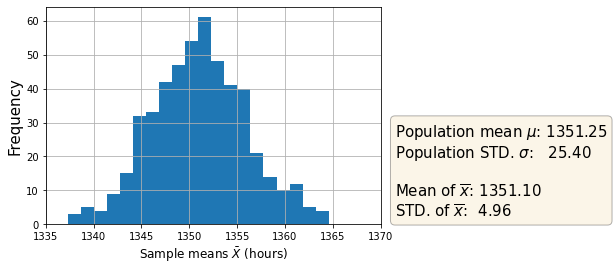

In [91]:
plot_sdistr(data_bulb['Lifespan'], n=25, repeats=500)

It can be seen that the mean of the sample mean $\bar{x}$ is very close to the population mean $\mu$. The standard deviation of $\bar{x}$, often referred to as the **standard error (SE)** of $\bar{x}$, is roughly one fifth of the population standard deviation $\sigma$. We are going to explain the results via following mathematical derivation.

As the number of repeated experiment goes to infinity, we can derive the expectation of $\mathbb{E}(\bar{x})$ as
\begin{align}
\mathbb{E}(\bar{x}) = \mathbb{E}\left(\frac{1}{n}\sum\limits_{i=1}^nx_i\right) = \frac{1}{n}\sum\limits_{i=1}^n\mathbb{E}(x_i) = \frac{1}{n}\sum\limits_{i=1}^n\mu = \mu.
\end{align}
Note that $\mathbb{E}[\bar{x}]$ is the same as the actual population mean $\mu$, the estimator $\bar{x}$ is thus called **unbiased**.

The variance of $\bar{x}$ can be written as
\begin{align}
\text{Var}(\bar{x}) = \text{Var}\left(\frac{1}{n}\sum\limits_{i=1}^nx_i\right) = \frac{1}{n^2}\sum\limits_{i=1}^n\text{Var}(x_i) = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n}, 
\end{align}
so the standard error $\text{SE}(\bar{x})=\sqrt{\text{Var}(\bar{x})}=\sqrt{\sigma^2/n}=\frac{\sigma}{\sqrt{n}}$. In the example above, we have the sample size to be $n=25$, so $\text{SE}(\bar{x})$ is one fifth of the population standard deviation $\sigma$. 

### Central Limit Theorem <a id="subsection4.4"></a>

<div class="alert alert-block alert-danger">
<b>Notes: The Central Limit Theorem (CLT): </b>  
    For a relatively large sample size, the random variable $\bar{x}=\sum\limits_{i=1}^nX_i$ is approximately normally distributed, regardless of the distribution of the population. The approximation becomes better with increased sample size. 
</div>

How to use the `plot_sdistr()` function to verify that 'the approximation becomes better with increased sample size'? 